In [1]:
import time
import datetime
import math
import subprocess
import sys

In [2]:
import pandas as pd
import pickle
import matplotlib as plt
from IPython.display import display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

C:\Users\lguerra5\AppData\Local\Continuum\anaconda3\envs\fnop\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [3]:
import numpy as np

In [4]:
ro_dtc_part_full = pd.read_csv('C:/Users/lguerra5/Documents/FNOP/DTC association - F150 case study/AWS_DTC_confirmed_subsystem_2017-21_F150.csv')

In [5]:
ro_dtc_part_full.head()

vin  mdl_yr veh_line_cd trans_cd eng_cd  tis_wsd    milge  \
0  1FTEW1CF0HFA71072  2017    T/FC        T/C3     T/MF   23       26534.0   
1  1FTEW1CF3HKD86939  2017    T/FC        T/C3     T/MF   11       13098.0   
2  1FTEW1CF8HFC79930  2017    T/FC        T/C3     T/MF   11       6710.0    
3  1FTEW1CFXHKC34205  2017    T/FC        T/C3     T/MF   3        4103.0    
4  1FTEW1CFXHKC80889  2017    T/FC        T/C3     T/MF   10       24242.0   

  part_base     ro_date  \
0  15604     2018-11-17   
1  15604     2018-06-18   
2  15604     2018-05-29   
3  15604     2017-02-17   
4  9H307     2018-02-28   

                                                                                                                                                                                                                                                              cust_eng_txt  \
0  CUSTOMER STATES BATTERY WAS REPLACED A COUPLE MONTHS AGO BUT BATTERY KEEPS GIVING PROBLEM, CHECK STARTING SYSTEM, BATTERY ALTERNATOR AND STARTER, CHECK AND ADVISE,..., CUSTOMER STATES AT TIMES AFTER JUMP START CENTER CONSOLE IS BLANK OR BLACKED OUT, PLS CK ADVISE   
1  ENGINE WIL NOT CRANK OVER , SAEEMS TO HAVE BATTERY PO WER                                                                                                                                                                                                                 
2  CUSTOMER STATES AUTO TAIL DOES NOT RELEASE                                                                                                                                                                                                                                
3  CHECK FOR TIRE LIGHT ON                                                                                                                                                                                                                                                   
4  ENGINE DIES WHEN AT AN INCLINE IF THE FUEL TANKIS AT 1/4 OR LESS                                                                                                                                                                                                          

            ecu_dtc  
0  0x760_C101A_0x16  
1  0x730_U0553_0x00  
2  0x760_U0155_0x68  
3  0x7A7_U0401_0x82  
4  0x7A7_U0401_0x82

In [6]:
# check vehicle line, trans fields for differences
ro_dtc_part_full.veh_line_cd.unique()

array(['T/FC', 'T/FD'], dtype=object)

In [7]:
ro_dtc_part_full.trans_cd.unique()

array(['T/C3', 'T/EU', 'T/GC'], dtype=object)

In [8]:
ro_dtc_part_full.eng_cd.unique()

array(['T/MF', 'T/UR', 'T/WQ', 'T/KX', 'T/RAV', 'T/RBF', 'T/RAX', 'T/KZ',
       'T/RBM', 'T/RCN'], dtype=object)

In [9]:
#strip whitespace from column
ro_dtc_part_full['part_base'] = ro_dtc_part_full['part_base'].str.strip()
ro_dtc_part_full['ecu_dtc'] = ro_dtc_part_full['ecu_dtc'].str.strip()

In [10]:
# Drop cust text column for now
ro_dtc_part_full.drop(columns = ['cust_eng_txt'], inplace = True)

### Filter to select base part noumbers only

In [11]:
# base part nos in charging and fuel subsystem only
bp_list = ['10346','15604','9F972','9G756','9F593','9H307','9D370','9F479','12A650','10C679','14A068']

In [12]:
ro_dtc_part_full = ro_dtc_part_full[ro_dtc_part_full['part_base'].isin(bp_list)]

In [13]:
ro_dtc_part_full

vin  mdl_yr veh_line_cd trans_cd eng_cd  tis_wsd  \
0       1FTEW1CF0HFA71072  2017    T/FC        T/C3     T/MF   23        
1       1FTEW1CF3HKD86939  2017    T/FC        T/C3     T/MF   11        
2       1FTEW1CF8HFC79930  2017    T/FC        T/C3     T/MF   11        
3       1FTEW1CFXHKC34205  2017    T/FC        T/C3     T/MF   3         
4       1FTEW1CFXHKC80889  2017    T/FC        T/C3     T/MF   10        
...                   ...   ...     ...         ...      ...   ..        
154071  1FTFW1ED9MFA88379  2021    T/FD        T/GC     T/RCN  1         
154072  1FTFW1EDXMFB23513  2021    T/FD        T/GC     T/RCN  1         
154073  1FTFX1E5XMKD67840  2021    T/FD        T/EU     T/RAV  3         
154074  1FTFX1E87MKD21280  2021    T/FD        T/EU     T/RBM  7         
154075  1FTMF1C53MKD58815  2021    T/FD        T/EU     T/RAV  3         

          milge part_base     ro_date           ecu_dtc  
0       26534.0  15604     2018-11-17  0x760_C101A_0x16  
1       13098.0  15604     2018-06-18  0x730_U0553_0x00  
2       6710.0   15604     2018-05-29  0x760_U0155_0x68  
3       4103.0   15604     2017-02-17  0x7A7_U0401_0x82  
4       24242.0  9H307     2018-02-28  0x7A7_U0401_0x82  
...         ...    ...            ...               ...  
154071  693.0    15604     2021-04-08  0x706_B1B50_0x08  
154072  478.0    15604     2021-04-26  0x7E0_U061E_0x00  
154073  2183.0   15604     2021-07-05  0x706_U3000_0x89  
154074  10012.0  15604     2021-07-08  0x741_B108F_0x23  
154075  5424.0   12A650    2021-07-27  0x7D0_U0415_0x00  

[154076 rows x 10 columns]

In [14]:
#check number of unique base part numbers
ro_dtc_part_full.part_base.nunique()

11

In [15]:
#check number of unique DTC codes
ro_dtc_part_full.ecu_dtc.nunique()

2208

### Count part repair vs DTC part repair

In [16]:
part_repair_count = ro_dtc_part_full.groupby('part_base')['vin'].count().to_frame(name='repair_count').reset_index()

In [17]:
part_repair_count.shape

(11, 2)

In [18]:
part_repair_count.head()

part_base  repair_count
0  10346     15468       
1  10C679    2030        
2  12A650    32162       
3  14A068    8954        
4  15604     40883

In [19]:
part_dtc_repair_count = ro_dtc_part_full.groupby(['part_base', 'ecu_dtc'])['vin'].count().to_frame(name='dtc_repair_count').reset_index()

In [20]:
part_dtc_repair_count.shape

(9336, 3)

In [21]:
len(list(set(list(part_dtc_repair_count['part_base']))))

11

In [22]:
part_dtc_repair_count.head()

part_base           ecu_dtc  dtc_repair_count
0  10346     0x6F0_U3003_0x16  2               
1  10346     0x6F1_P2EA7_0x00  1               
2  10346     0x706_B115E_0x15  2               
3  10346     0x706_B115E_0x31  1               
4  10346     0x706_B120C_0x11  2

#### merge together repair parts and parts that we can associate DTC

In [23]:
part_dtc_summary = part_dtc_repair_count.merge(part_repair_count, 'inner')

In [24]:
len(list(set(list(part_dtc_summary['part_base']))))

11

In [25]:
part_dtc_summary['normalized_repair_count']=part_dtc_summary['dtc_repair_count']/part_dtc_summary['repair_count']

In [26]:
part_dtc_summary.head()

part_base           ecu_dtc  dtc_repair_count  repair_count  \
0  10346     0x6F0_U3003_0x16  2                 15468          
1  10346     0x6F1_P2EA7_0x00  1                 15468          
2  10346     0x706_B115E_0x15  2                 15468          
3  10346     0x706_B115E_0x31  1                 15468          
4  10346     0x706_B120C_0x11  2                 15468          

   normalized_repair_count  
0  0.000129                 
1  0.000065                 
2  0.000129                 
3  0.000065                 
4  0.000129

In [27]:
# save output as csv
#part_dtc_summary.to_csv('C:/Projects/FCSD/FNOP/ML-AI meeting/DTC correlation study/AWS_part_to_DTC_normalized_2018-21_F150.csv', index = False)

### plot part over the overall repair count histogram

In [28]:
part_overall_repair_df = part_dtc_summary[['part_base', 'repair_count']].drop_duplicates()

In [29]:
part_overall_repair_df['repair_count'].describe()

count    11.000000   
mean     14006.909091
std      13291.033470
min      1666.000000 
25%      3420.500000 
50%      9083.000000 
75%      20434.000000
max      40883.000000
Name: repair_count, dtype: float64

In [30]:
part_overall_repair_df.head(5)

part_base  repair_count
0     10346     15468       
921   10C679    2030        
1412  12A650    32162       
2938  14A068    8954        
3996  15604     40883

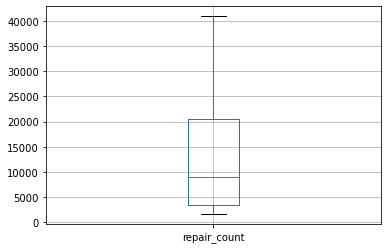

In [31]:
ax = part_overall_repair_df.boxplot()

#### keep only part that has been repaired for more than 5 instances

In [32]:
major_part_overall_repair = part_overall_repair_df.loc[lambda df: df['repair_count'] >=5, ]

In [33]:
major_part_overall_repair['repair_count'].describe()

count    11.000000   
mean     14006.909091
std      13291.033470
min      1666.000000 
25%      3420.500000 
50%      9083.000000 
75%      20434.000000
max      40883.000000
Name: repair_count, dtype: float64

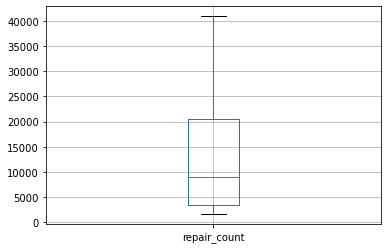

In [34]:
ax = major_part_overall_repair.boxplot()

In [35]:
major_part_dtc_summary = part_dtc_summary.loc[lambda df: df['repair_count'] >=5, ]

In [36]:
major_part_dtc_summary.sort_values('repair_count', ascending=False).head(10)

part_base           ecu_dtc  dtc_repair_count  repair_count  \
4668  15604     0x740_U0140_0x00  201               40883          
4824  15604     0x760_C1013_0x7A  3                 40883          
4831  15604     0x760_C1A90_0x16  1                 40883          
4830  15604     0x760_C1A76_0x49  21                40883          
4829  15604     0x760_C1A08_0x1C  5                 40883          
4828  15604     0x760_C1034_0x01  4                 40883          
4827  15604     0x760_C101F_0x49  4                 40883          
4826  15604     0x760_C101A_0x16  26                40883          
4825  15604     0x760_C1013_0x92  4                 40883          
4823  15604     0x760_C1013_0x09  1                 40883          

      normalized_repair_count  
4668  0.004916                 
4824  0.000073                 
4831  0.000024                 
4830  0.000514                 
4829  0.000122                 
4828  0.000098                 
4827  0.000098                 
4826  0.000636                 
4825  0.000098                 
4823  0.000024

#### check dtc count summary

In [37]:
dtc_count_summary = major_part_dtc_summary.groupby('ecu_dtc')['dtc_repair_count'].sum().to_frame(name='dtc_sum').reset_index()

In [38]:
dtc_count_summary.dtc_sum.describe()

count    2208.000000
mean     69.780797  
std      252.010171 
min      1.000000   
25%      2.000000   
50%      7.000000   
75%      38.000000  
max      3763.000000
Name: dtc_sum, dtype: float64

In [39]:
dtc_count_summary.sort_values('dtc_sum', ascending=False).head(10)

ecu_dtc  dtc_sum
1310  0x7A7_U0452_0x82  3763   
73    0x706_C1001_0x97  3483   
892   0x754_U0140_0x00  3444   
543   0x730_U0140_0x00  3339   
896   0x754_U0253_0x00  2818   
181   0x720_U0140_0x00  2782   
891   0x754_U0100_0x00  2770   
575   0x730_U3003_0x68  2621   
1307  0x7A7_U0253_0x00  2166   
1309  0x7A7_U0401_0x82  2051

#### normalize the dtc repair count (major summary)

In [40]:
major_part_dtc_summary['normalized_repair_count']=major_part_dtc_summary['dtc_repair_count']/major_part_dtc_summary['repair_count']

In [41]:
major_part_dtc_pivot = major_part_dtc_summary.pivot(index='ecu_dtc',columns='part_base',values='normalized_repair_count')

In [42]:
major_part_dtc_pivot_df = major_part_dtc_pivot.fillna(0.0)

In [43]:
major_part_dtc_pivot_df.shape

(2208, 11)

In [44]:
major_part_dtc_pivot_df.head(5)

part_base         10346  10C679    12A650    14A068     15604  9D370  9F479  \
ecu_dtc                                                                       
0x6F0_P0CE2_0x00  0.0    0.0     0.000000  0.000112  0.000000  0.0    0.0     
0x6F0_P2CFC_0x00  0.0    0.0     0.000000  0.000112  0.000000  0.0    0.0     
0x6F0_U0100_0x87  0.0    0.0     0.000342  0.000112  0.000098  0.0    0.0     
0x6F0_U0121_0x87  0.0    0.0     0.000031  0.000223  0.000000  0.0    0.0     
0x6F0_U0140_0x87  0.0    0.0     0.000124  0.001452  0.000245  0.0    0.0     

part_base         9F593  9F972  9G756  9H307  
ecu_dtc                                       
0x6F0_P0CE2_0x00  0.0    0.0    0.0    0.0    
0x6F0_P2CFC_0x00  0.0    0.0    0.0    0.0    
0x6F0_U0100_0x87  0.0    0.0    0.0    0.0    
0x6F0_U0121_0x87  0.0    0.0    0.0    0.0    
0x6F0_U0140_0x87  0.0    0.0    0.0    0.0

#### Use repairs with DTC data to build classification to build model input DF

In [45]:
ro_dtc_part_full.shape

(154076, 10)

In [46]:
### inner join with major part list
major_ro_dtc_part_df = ro_dtc_part_full.merge(major_part_overall_repair[['part_base']], 'inner')

In [47]:
major_ro_dtc_part_df.shape

(154076, 10)

In [48]:
len(set(list(major_ro_dtc_part_df['part_base'])))

11

In [49]:
major_ro_dtc_part_df['event'] = 1.0

In [50]:
major_ro_dtc_part_df['index'] = major_ro_dtc_part_df[['vin','ro_date','part_base']].apply(lambda x: ''.join(x), axis=1)

In [51]:
major_ro_dtc_part_df.head(5)

vin  mdl_yr veh_line_cd trans_cd eng_cd  tis_wsd    milge  \
0  1FTEW1CF0HFA71072  2017    T/FC        T/C3     T/MF   23       26534.0   
1  1FTEW1CF3HKD86939  2017    T/FC        T/C3     T/MF   11       13098.0   
2  1FTEW1CF8HFC79930  2017    T/FC        T/C3     T/MF   11       6710.0    
3  1FTEW1CFXHKC34205  2017    T/FC        T/C3     T/MF   3        4103.0    
4  1FTEW1CG3HKD22781  2017    T/FC        T/EU     T/UR   8        8066.0    

  part_base     ro_date           ecu_dtc  event  \
0  15604     2018-11-17  0x760_C101A_0x16  1.0     
1  15604     2018-06-18  0x730_U0553_0x00  1.0     
2  15604     2018-05-29  0x760_U0155_0x68  1.0     
3  15604     2017-02-17  0x7A7_U0401_0x82  1.0     
4  15604     2018-01-29  0x726_U0252_0x87  1.0     

                              index  
0  1FTEW1CF0HFA710722018-11-1715604  
1  1FTEW1CF3HKD869392018-06-1815604  
2  1FTEW1CF8HFC799302018-05-2915604  
3  1FTEW1CFXHKC342052017-02-1715604  
4  1FTEW1CG3HKD227812018-01-2915604

In [52]:
# check duplicates on index column
a = major_ro_dtc_part_df.duplicated(subset='index', keep='first').sum()
print(a)

137823


In [53]:
#major_ro_dtc_part_pivot = major_ro_dtc_part_df.pivot(index='index',columns='ecu_dtc',values='event').reset_index()
major_ro_dtc_part_pivot = major_ro_dtc_part_df.pivot_table(index='index',columns='ecu_dtc',values='event').reset_index()

In [54]:
major_ro_dtc_part_pivot.shape

(16253, 2209)

In [55]:
major_ro_dtc_part_pivot['RO'] = major_ro_dtc_part_pivot['index'].apply(lambda x: x[:27])
major_ro_dtc_part_pivot['part_number'] = major_ro_dtc_part_pivot['index'].apply(lambda x: x[27:])

In [56]:
major_ro_dtc_part_pivot.head(5)

ecu_dtc                              index  0x6F0_P0CE2_0x00  \
0        1FTEW1C40KFA299922019-12-1014A068 NaN                 
1        1FTEW1C40KKD107942019-05-1415604  NaN                 
2        1FTEW1C40KKD446402020-02-1012A650 NaN                 
3        1FTEW1C40KKD446402020-04-1615604  NaN                 
4        1FTEW1C40KKD947932020-02-0515604  NaN                 

ecu_dtc  0x6F0_P2CFC_0x00  0x6F0_U0100_0x87  0x6F0_U0121_0x87  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F0_U0140_0x87  0x6F0_U0164_0x87  0x6F0_U1000_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F0_U2100_0x00  0x6F0_U3000_0x49  0x6F0_U3003_0x16  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F0_U3003_0x17  0x6F1_B0128_0x00  0x6F1_B0129_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F1_B012A_0x00  0x6F1_B012B_0x00  0x6F1_B012E_0x08  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F1_B131A_0x16  0x6F1_B131A_0x17  0x6F1_P2EA7_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F1_U0100_0x00  0x6F1_U0100_0x87  0x6F1_U0140_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F1_U0151_0x00  0x6F1_U0151_0x87  0x6F1_U0293_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F1_U0401_0x00  0x6F2_U2100_0x00  0x6F2_U3003_0x16  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x6F2_U3003_0x17  0x6F3_B129D_0x97  0x6F3_U3003_0x16  \
0       NaN               NaN  

In [57]:
model_input_df = major_ro_dtc_part_pivot.iloc[:, 1:].fillna(0.0)

In [58]:
model_input_df.shape

(16253, 2210)

In [59]:
model_input_df.head(5)

ecu_dtc  0x6F0_P0CE2_0x00  0x6F0_P2CFC_0x00  0x6F0_U0100_0x87  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F0_U0121_0x87  0x6F0_U0140_0x87  0x6F0_U0164_0x87  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F0_U1000_0x00  0x6F0_U2100_0x00  0x6F0_U3000_0x49  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F0_U3003_0x16  0x6F0_U3003_0x17  0x6F1_B0128_0x00  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F1_B0129_0x00  0x6F1_B012A_0x00  0x6F1_B012B_0x00  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F1_B012E_0x08  0x6F1_B131A_0x16  0x6F1_B131A_0x17  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F1_P2EA7_0x00  0x6F1_U0100_0x00  0x6F1_U0100_0x87  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F1_U0140_0x00  0x6F1_U0151_0x00  0x6F1_U0151_0x87  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F1_U0293_0x00  0x6F1_U0401_0x00  0x6F2_U2100_0x00  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F2_U3003_0x16  0x6F2_U3003_0x17  0x6F3_B129D_0x97  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x6F3_U3003_0x16  0x6F3_U3003_0x17  0x706_B115E_0x15  \
0        0.0             

### Group By Unique DTC Combo and RO

we want the unique parts number grouped by RO, not total, one row should have uique DTC combo -- part numbers repaired for ONE RO

In [60]:
col_list = model_input_df.columns.values
col_list = col_list[:-1]
col_list = col_list.tolist()
#col_list

In [61]:
grouped = model_input_df.groupby(col_list)['part_number'].unique().reset_index()

In [62]:
grouped

0x6F0_P0CE2_0x00  0x6F0_P2CFC_0x00  0x6F0_U0100_0x87  0x6F0_U0121_0x87  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               1.0               0.0                
15544  0.0               0.0               1.0               0.0                
15545  0.0               0.0               1.0               1.0                
15546  0.0               1.0               0.0               0.0                
15547  1.0               0.0               0.0               0.0                

       0x6F0_U0140_0x87  0x6F0_U0164_0x87  0x6F0_U1000_0x00  0x6F0_U2100_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  1.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F0_U3000_0x49  0x6F0_U3003_0x16  0x6F0_U3003_0x17  0x6F1_B0128_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               1.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B0129_0x00  0x6F1_B012A_0x00  0x6F1_B012B_0x00  0x6F1_B012E_0x08  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B131A_0x16  0x6F1_B131A_0x17  0x6F1_P2EA7_0x00  0x6F1_U0100_0x00  \
0      0.0               0.0      

In [63]:
# Check DTC and part number for first row
d = [c for c in grouped.columns if grouped[c][0] == 1] 
print(d)
print(grouped['RO'][0])
print(grouped['part_number'][0])

['0x7E1_P160A_0x00']
1FTEW1E4XKFA523542020-05-04
['12A650']


In [64]:
# check first row in input data
major_ro_dtc_part_df[(major_ro_dtc_part_df['ecu_dtc'] == '0x7E1_P160A_0x00') & (major_ro_dtc_part_df['part_base'] == '12A650')]

vin  mdl_yr veh_line_cd trans_cd eng_cd  tis_wsd  \
54180  1FTFW1RG4HFC35590  2017    T/FC        T/EU     T/UR   18        
54229  1FTEW1EG7HFB52303  2017    T/FC        T/EU     T/UR   22        
60859  1FTEW1EG0JFA56745  2018    T/FC        T/EU     T/UR   9         
62866  1FTEW1E44KKD90663  2019    T/FC        T/EU     T/UR   17        
64984  1FTEW1E47KFA73162  2019    T/FC        T/EU     T/UR   12        
64991  1FTEW1E4XKKE78312  2019    T/FC        T/EU     T/UR   12        
65074  1FTEW1E4XKFA52354  2019    T/FC        T/EU     T/UR   9         
69455  1FTFW1RG2LFC62781  2020    T/FC        T/EU     T/KZ   4         

         milge part_base     ro_date           ecu_dtc  event  \
54180  17883.0  12A650    2019-01-10  0x7E1_P160A_0x00  1.0     
54229  34177.0  12A650    2019-03-25  0x7E1_P160A_0x00  1.0     
60859  10843.0  12A650    2018-07-18  0x7E1_P160A_0x00  1.0     
62866  20451.0  12A650    2021-03-29  0x7E1_P160A_0x00  1.0     
64984  17744.0  12A650    2020-10-23  0x7E1_P160A_0x00  1.0     
64991  19769.0  12A650    2021-04-06  0x7E1_P160A_0x00  1.0     
65074  23089.0  12A650    2020-05-04  0x7E1_P160A_0x00  1.0     
69455  3161.0   12A650    2021-03-09  0x7E1_P160A_0x00  1.0     

                                   index  
54180  1FTFW1RG4HFC355902019-01-1012A650  
54229  1FTEW1EG7HFB523032019-03-2512A650  
60859  1FTEW1EG0JFA567452018-07-1812A650  
62866  1FTEW1E44KKD906632021-03-2912A650  
64984  1FTEW1E47KFA731622020-10-2312A650  
64991  1FTEW1E4XKKE783122021-04-0612A650  
65074  1FTEW1E4XKFA523542020-05-0412A650  
69455  1FTFW1RG2LFC627812021-03-0912A650

### Add other column features to model input DF

In [65]:
# create column to join dfs on
major_ro_dtc_part_df['RO'] = major_ro_dtc_part_df['index'].apply(lambda x: x[:27])

In [66]:
# group by RO
add_feats = major_ro_dtc_part_df.groupby('RO').agg({'mdl_yr': 'first', 'veh_line_cd': 'first', 'trans_cd': 'first', 'eng_cd': 'first', 'tis_wsd': 'first', 'milge': 'first'}).reset_index()

In [67]:
# create one-hot encoding for engine, trans, model year, vehicle line vars
df_X = add_feats[['mdl_yr','tis_wsd','milge', 'trans_cd', 'veh_line_cd', 'eng_cd']]

In [68]:
df_X['mdl_yr'] = df_X['mdl_yr'].astype('object')

C:\Users\lguerra5\AppData\Local\Continuum\anaconda3\envs\fnop\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
## convert to one-hot encoding
df_X_dummy = pd.get_dummies(df_X)

In [70]:
df_X_dummy['RO'] = add_feats['RO']

In [71]:
df_X_dummy.shape

(15548, 23)

In [72]:
df_X_dummy.head()

tis_wsd    milge  mdl_yr_2017  mdl_yr_2018  mdl_yr_2019  mdl_yr_2020  \
0  10       15798.0  0            0            1            0             
1  1        354.0    0            0            1            0             
2  2        2238.0   0            0            1            0             
3  4        4940.0   0            0            1            0             
4  7        8852.0   0            0            1            0             

   mdl_yr_2021  trans_cd_T/C3  trans_cd_T/EU  trans_cd_T/GC  veh_line_cd_T/FC  \
0  0            0              1              0              1                  
1  0            0              1              0              1                  
2  0            0              1              0              1                  
3  0            0              1              0              1                  
4  0            0              1              0              1                  

   veh_line_cd_T/FD  eng_cd_T/KX  eng_cd_T/KZ  eng_cd_T/MF  eng_cd_T/RAV  \
0  0                 0            0            0            0              
1  0                 0            0            0            0              
2  0                 0            0            0            0              
3  0                 0            0            0            0              
4  0                 0            0            0            0              

   eng_cd_T/RAX  eng_cd_T/RBF  eng_cd_T/RBM  eng_cd_T/RCN  eng_cd_T/UR  \
0  0             0             0             0             1             
1  0             0             0             0             1             
2  0             0             0             0             1             
3  0             0             0             0             1             
4  0             0             0             0             1             

   eng_cd_T/WQ                           RO  
0  0            1FTEW1C40KFA299922019-12-10  
1  0            1FTEW1C40KKD107942019-05-14  
2  0            1FTEW1C40KKD446402020-02-10  
3  0            1FTEW1C40KKD446402020-04-16  
4  0            1FTEW1C40KKD947932020-02-05

In [73]:
# join with model input df
model_input_df_new = grouped.merge(df_X_dummy, on = 'RO', how = 'inner')

In [74]:
#fix column oder
cols = list(model_input_df_new.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('tis_wsd')) 
cols.pop(cols.index('milge'))
cols.pop(cols.index('RO')) 
cols.pop(cols.index('part_number')) 
model_input_new = model_input_df_new[cols+['tis_wsd','milge','RO','part_number']] #Create new dataframe with columns in the order you want
model_input_new

0x6F0_P0CE2_0x00  0x6F0_P2CFC_0x00  0x6F0_U0100_0x87  0x6F0_U0121_0x87  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               1.0               0.0                
15544  0.0               0.0               1.0               0.0                
15545  0.0               0.0               1.0               1.0                
15546  0.0               1.0               0.0               0.0                
15547  1.0               0.0               0.0               0.0                

       0x6F0_U0140_0x87  0x6F0_U0164_0x87  0x6F0_U1000_0x00  0x6F0_U2100_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  1.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F0_U3000_0x49  0x6F0_U3003_0x16  0x6F0_U3003_0x17  0x6F1_B0128_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               1.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B0129_0x00  0x6F1_B012A_0x00  0x6F1_B012B_0x00  0x6F1_B012E_0x08  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B131A_0x16  0x6F1_B131A_0x17  0x6F1_P2EA7_0x00  0x6F1_U0100_0x00  \
0      0.0               0.0      

### Use Multi-label Binarizer to encode multi part labels

In [75]:
#importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
#instantiating MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [76]:
#Encode the multilabel data in MLB Format
part_no_mlb = mlb.fit_transform(grouped['part_number'])
part_no_mlb

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
part_no_mlb.shape

(15548, 11)

In [78]:
#check first row
part_no_mlb[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
#mlb.inverse_transform(part_no_mlb)

In [80]:
mlb.classes_

array(['10346', '10C679', '12A650', '14A068', '15604', '9D370', '9F479',
       '9F593', '9F972', '9G756', '9H307'], dtype=object)

In [81]:
model_input_new.iloc[:,:-2]

0x6F0_P0CE2_0x00  0x6F0_P2CFC_0x00  0x6F0_U0100_0x87  0x6F0_U0121_0x87  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               1.0               0.0                
15544  0.0               0.0               1.0               0.0                
15545  0.0               0.0               1.0               1.0                
15546  0.0               1.0               0.0               0.0                
15547  1.0               0.0               0.0               0.0                

       0x6F0_U0140_0x87  0x6F0_U0164_0x87  0x6F0_U1000_0x00  0x6F0_U2100_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  1.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F0_U3000_0x49  0x6F0_U3003_0x16  0x6F0_U3003_0x17  0x6F1_B0128_0x00  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               1.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B0129_0x00  0x6F1_B012A_0x00  0x6F1_B012B_0x00  0x6F1_B012E_0x08  \
0      0.0               0.0               0.0               0.0                
1      0.0               0.0               0.0               0.0                
2      0.0               0.0               0.0               0.0                
3      0.0               0.0               0.0               0.0                
4      0.0               0.0               0.0               0.0                
...    ...               ...               ...               ...                
15543  0.0               0.0               0.0               0.0                
15544  0.0               0.0               0.0               0.0                
15545  0.0               0.0               0.0               0.0                
15546  0.0               0.0               0.0               0.0                
15547  0.0               0.0               0.0               0.0                

       0x6F1_B131A_0x16  0x6F1_B131A_0x17  0x6F1_P2EA7_0x00  0x6F1_U0100_0x00  \
0      0.0               0.0      

In [83]:
2230/15548

0.14342680730640597

### Build classification models with RF

In [84]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler, LabelEncoder
#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [85]:
from sklearn.metrics import accuracy_score, jaccard_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [86]:
X_train, X_eval, y_train, y_eval = train_test_split(model_input_new.iloc[:,:-2], part_no_mlb, test_size = 0.2, random_state = 11)

In [87]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_split = 3, min_samples_leaf = 1, max_features = 'auto')
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3)

In [88]:
y_pred = clf.predict(X_eval)

In [89]:
y_prob = clf.predict_proba(X_eval)

### Calculate Metrics - RF 

In [98]:
# exact match accuracy
accuracy_score(y_eval, y_pred)

0.467524115755627

In [99]:
partwise_recall = np.array([recall_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [100]:
partwise_recall

array([0.56521739, 0.02564103, 0.5495356 , 0.00729927, 0.35913313,
       0.        , 0.80962343, 0.54385965, 0.09774436, 0.        ,
       0.2038835 ])

In [101]:
partwise_precision = np.array([precision_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [102]:
partwise_precision

array([0.89142857, 1.        , 0.90561224, 0.5       , 0.71384615,
       0.        , 0.97236181, 0.81578947, 0.48148148, 0.        ,
       0.85714286])

In [103]:
partwise_f1 = np.array([f1_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [104]:
partwise_f1

array([0.69179601, 0.05      , 0.68400771, 0.01438849, 0.47785788,
       0.        , 0.88356164, 0.65263158, 0.1625    , 0.        ,
       0.32941176])

In [105]:
## Aggregated Matrics - Mico and Macro

In [106]:
#### macro recall
## simple average of recall over all classes
recall_macro = np.mean(partwise_recall)

In [107]:
recall_macro

0.28744885034559614

In [108]:
precision_macro = np.mean(partwise_precision)

In [109]:
precision_macro

0.6488784174114964

In [110]:
f1_macro = np.mean(partwise_f1)

In [111]:
f1_macro

0.3587413701065066

In [113]:
#### micro recall
#### total number of TP / total number of True in y_true
recall_micro = sum([sum(np.logical_and(y_eval[:,i], y_pred[:,i])) for i in range(y_eval.shape[1])]) / sum([sum(y_eval[:,i]) for i in range(y_eval.shape[1])])

In [114]:
recall_micro

0.4626081582200247

In [116]:
#### micro precision
#### total number of TP / total number of True in y_pred
precision_micro = sum([sum(np.logical_and(y_eval[:,i], y_pred[:,i])) for i in range(y_eval.shape[1])]) / sum([sum(y_pred[:,i]) for i in range(y_eval.shape[1])])

In [117]:
precision_micro

0.855917667238422

In [118]:
f1_micro = 2*recall_micro*precision_micro/(recall_micro+precision_micro)

In [119]:
f1_micro

0.6006018054162487

In [139]:
## check the count of parts in the report_df
#part_count_report_df = report_df.merge(part_count_model_df, 'inner')

In [140]:
#part_count_report_df.sort_values('f1-score', ascending=False).head(100)

In [141]:
#part_count_report_df.to_csv('C:/Users/lguerra5/Documents/FNOP/DTC association - F150 case study/GUDB_part_by_repair_date_clf_basepart_report_explist.csv', index=False)

### Build Model using RF + Chain Classifier

In [120]:
from sklearn.multioutput import ClassifierChain

In [121]:
clf1 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_split = 3, min_samples_leaf = 1, max_features = 'auto')

In [122]:
chain = ClassifierChain(clf1, order='random', random_state=0)

In [123]:
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(min_samples_split=3),
                order='random', random_state=0)

In [124]:
y_pred1 = chain.predict(X_eval)

In [125]:
y_prob1 = chain.predict_proba(X_eval)

### Calculate Metrics - RF 

In [126]:
# exact match accuracy
accuracy_score(y_eval, y_pred1)

0.5459807073954984

In [133]:
partwise_recall_chain = np.array([recall_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [134]:
partwise_recall_chain

array([0.63405797, 0.02564103, 0.6006192 , 0.05109489, 0.45356037,
       0.09615385, 0.82217573, 0.73508772, 0.21052632, 0.        ,
       0.24271845])

In [135]:
partwise_precision_chain = np.array([precision_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [136]:
partwise_precision_chain

array([0.85784314, 1.        , 0.87191011, 0.38888889, 0.72167488,
       0.71428571, 0.9538835 , 0.62912913, 0.5       , 0.        ,
       0.69444444])

In [137]:
partwise_f1_chain = np.array([f1_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [138]:
partwise_f1_chain

array([0.72916667, 0.05      , 0.71127406, 0.09032258, 0.55703422,
       0.16949153, 0.88314607, 0.67799353, 0.2962963 , 0.        ,
       0.35971223])

In [139]:
## Aggregated Matrics - Mico and Macro

In [140]:
#### macro recall
## simple average of recall over all classes
recall_macro_chain = np.mean(partwise_recall_chain)

In [141]:
recall_macro_chain

0.35196686489009227

In [142]:
precision_macro_chain = np.mean(partwise_precision_chain)

In [143]:
precision_macro_chain

0.6665508907595956

In [144]:
f1_macro_chain = np.mean(partwise_f1_chain)

In [145]:
f1_macro_chain

0.4113124704726163

#### Generate Metrics Report

In [146]:
### get number of parts in the evaluation set
num_part_eval = [sum(y_eval[:,i]) for i in range(y_eval.shape[1])]

In [147]:
num_part_eval

[276, 39, 646, 137, 646, 52, 478, 570, 133, 53, 206]

In [148]:
y_labels = mlb.classes_

In [149]:
report_df = pd.DataFrame(np.array([y_labels, num_part_eval, partwise_recall_chain, partwise_precision_chain, partwise_f1_chain]).T, columns=['target', 'target_count', 'recall', 'precision', 'f1-score'])

In [150]:
report_df = report_df.append({'target':'macro', 'target_count': '', 'recall':recall_macro, 'precision': precision_macro, 'f1-score':f1_macro}, ignore_index=True)

In [151]:
report_df = report_df.append({'target':'micro', 'target_count': '', 'recall':recall_micro, 'precision': precision_micro, 'f1-score':f1_micro}, ignore_index=True)

In [152]:
report_df

target target_count     recall precision   f1-score
0   10346   276          0.634058   0.857843  0.729167 
1   10C679  39           0.025641   1         0.05     
2   12A650  646          0.600619   0.87191   0.711274 
3   14A068  137          0.0510949  0.388889  0.0903226
4   15604   646          0.45356    0.721675  0.557034 
5   9D370   52           0.0961538  0.714286  0.169492 
6   9F479   478          0.822176   0.953883  0.883146 
7   9F593   570          0.735088   0.629129  0.677994 
8   9F972   133          0.210526   0.5       0.296296 
9   9G756   53           0          0         0        
10  9H307   206          0.242718   0.694444  0.359712 
11  macro                0.287449   0.648878  0.358741 
12  micro                0.462608   0.855918  0.600602